# El éxito de los videojuegos

Se identificarán los patrones de los videojuegos vendidos por la tienda online Ice analizando las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y datos históricos para determinar si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.

# Contents <a id='back'></a>

* [Introducción](#intro)
* [Inicialización](#inicializacion)
* [Cargando datos](#cargando_datos)
* [Explorando datos iniciales](#explorando_datos_iniciales)
* [Preprocesamiento de datos](#preprocesamiento_de_datos)
* [Tratar los valores ausentes](#tratar_los_valores_ausentes)
* [Corregiendo los datos](#corregiendo_los_datos)
* [Estudiar parámetros principales](#estudiar_parámetros_principales)
* [Perfil de usuario para cada región](#perfil_de_usuario_para_cada_región)
* [Probando las hipótesis estadísticas](#probando_las_hipótesis_estadísticas)
* [Probando las hipótesis estadísticas](#probando_las_hipótesis_estadísticas)
* [Conclusión general](#end)

## Introducción <a id='intro'></a>
**Propósito del proyecto**

Determinar si un juego tiene éxito o no paa detectar proyecto prometedores y planificar campañas publicitarias para el año 2017


### Objetivos
1. Identificar plataformas líderes en ventas,
2. Determinar si las clasificaciones de ESRB afectan a las ventas en regiones individuales,
3. Calcular las ventas totales (la suma de las ventas en todas las regiones) para cada juego.

## Inicialización <a id='inicializacion'></a>

In [1]:
# Cargando las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy import stats
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

## Cargando datos <a id='cargando_datos'></a>

In [2]:
# Cargando los archivos de datos en diferentes DataFrames
gd = pd.read_csv('//datasets/games.csv')

[Volver a Contenidos](#back)

## Explorando datos iniciales <a id='explorando_datos_iniciales'></a>

**Descripción de datos**

- `Name` — (nombre)
- `Platform` — (plataforma)
- `Year_of_Release` — (año de lanzamiento)
- `Genre` — (género)
- `NA_sales` — (ventas en Norteamérica en millones de dólares estadounidenses)
- `EU_sales` — (ventas en Europa en millones de dólares estadounidenses)
- `JP_sales` — (ventas en Japón en millones de dólares estadounidenses)
- `Other_sales` — (ventas en otros países en millones de dólares estadounidenses)
- `Critic_Score` — (puntuación de la crítica - máximo de 100)
- `User_Score` — (puntuación del usuario - máximo de 10)
- `Clasificación` — (ESRB)

In [3]:
# Filas y columnas del DataFrame
gd.shape

(16715, 11)

In [4]:
# Imprimiendo la información general/resumida sobre el DataFrame
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
gd.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
95%,2015.000000,1.060000,0.620000,0.360000,0.200000,89.000000
99%,2016.000000,2.790000,1.938600,1.268600,0.630000,94.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
gd.describe(exclude=['int', 'float'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [7]:
# Imprimiendo una muestra de los datos
gd.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Valores ausentes**

In [8]:
gd.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

### Conclusiones y siguientes pasos

El DataFrame **gd** tiene 16.715 filas y 11 columnas, tenemos valores ausentes en las columnas Critic_Score, Rating, User_Score, Year_of_Release, Name y Genre.

Para continuar, necesitamos preprocesar los datos.

[Volver a Contenidos](#back)

## Preprocesamiento de datos <a id='preprocesamiento_de_datos'></a>

### Estilo del encabezado
Imprime el encabezado de la columna:

In [9]:
# Lista de los nombres de las columnas en la tabla gd
gd.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [10]:
# Renombrando las columnas
gd.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating',
    }, inplace=True
)

In [11]:
# Comprobando el resultado: los nombres de las columnas
gd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
#Corrigiendo la columna name
gd["name"]= gd["name"].astype("str").str.strip()
sorted(gd["name"].unique())

["'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Riven: The Psi-Climinal of Integral',
 '15 Days',
 '1701 A.D.',
 '18 Wheeler: American Pro Trucker',
 '18 Wheels of Steel: Ext

**Valores únicos**

In [13]:
gd["platform"].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [14]:
gd["year_of_release"].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [15]:
gd["genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [16]:
gd["critic_score"].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [17]:
gd["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
gd["rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [19]:
#
gd.loc[gd["user_score"] == "tbd", "user_score"] = float("NaN")

In [20]:
gd["user_score"] = gd["user_score"].astype("float64")

In [21]:
gd["user_score"].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [22]:
#Calculando las ventas totales
gd["total_sales"] = gd["na_sales"] + gd["eu_sales"] + gd["jp_sales"] + gd["other_sales"]
gd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


[Volver a Contenidos](#back)

## Tratar los valores ausentes <a id='tratar_los_valores_ausentes'></a>

### Preprocesamiento de datos

In [23]:
#Calculando el % de valores ausentes por columna
gd.isna().sum().sort_values(ascending=False) / 16715

user_score         0.545917
critic_score       0.513192
rating             0.404786
year_of_release    0.016093
genre              0.000120
name               0.000000
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
total_sales        0.000000
dtype: float64

In [24]:
#DataFrame sin valores ausentes
gd_notnan = gd.dropna()
gd_notnan.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [25]:
gd_notnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6826 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6826 non-null   object 
 1   platform         6826 non-null   object 
 2   year_of_release  6826 non-null   float64
 3   genre            6826 non-null   object 
 4   na_sales         6826 non-null   float64
 5   eu_sales         6826 non-null   float64
 6   jp_sales         6826 non-null   float64
 7   other_sales      6826 non-null   float64
 8   critic_score     6826 non-null   float64
 9   user_score       6826 non-null   float64
 10  rating           6826 non-null   object 
 11  total_sales      6826 non-null   float64
dtypes: float64(8), object(4)
memory usage: 693.3+ KB


In [26]:
gd_notnan["user_score"].unique()

array([8. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9, 8.1,
       8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2,
       7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1,
       6.7, 5.4, 4. , 9.3, 6.2, 4.2, 6. , 4.9, 3.7, 4.1, 5.8, 5.6, 5.5,
       4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.5, 5.1, 3.5, 2.5, 1.9,
       2.2, 2. , 9.5, 4.7, 2.1, 3.6, 1.8, 3.8, 3. , 9.6, 2.8, 1.7, 2.7,
       2.4, 1.5, 1.2, 2.3, 0.5, 0.6, 0.9, 1. , 1.4, 1.3, 0.7])

In [27]:
gd_notnan["user_score"] = gd_notnan["user_score"].astype("float64")

In [28]:
gd_notnan["user_score"]

0        8.0
2        8.3
3        8.0
6        8.5
7        6.6
        ... 
16663    2.4
16673    8.8
16692    7.6
16696    5.8
16702    7.2
Name: user_score, Length: 6826, dtype: float64

In [29]:
#Comparando columna rating con valores ausentes vs no valores ausentes
print(gd_notnan["rating"].value_counts(normalize=True))
print(gd["rating"].value_counts(normalize=True))

T       0.348374
E       0.305010
M       0.209933
E10+    0.136244
AO      0.000146
K-A     0.000146
RP      0.000146
Name: rating, dtype: float64
E       0.401045
T       0.297618
M       0.157101
E10+    0.142728
EC      0.000804
K-A     0.000302
RP      0.000302
AO      0.000101
Name: rating, dtype: float64


In [30]:
#Comparando columna year_of_release con valores ausentes vs no valores ausentes
print(gd_notnan["year_of_release"].value_counts(normalize=True))
print(gd["year_of_release"].value_counts(normalize=True))

2008.0    0.086727
2007.0    0.086434
2005.0    0.082332
2009.0    0.080574
2006.0    0.077351
2003.0    0.072956
2004.0    0.069733
2002.0    0.066657
2011.0    0.066510
2010.0    0.062848
2012.0    0.045854
2013.0    0.038969
2001.0    0.037504
2014.0    0.037064
2016.0    0.031058
2015.0    0.030911
2000.0    0.014943
1999.0    0.004395
1998.0    0.003662
1997.0    0.001904
1996.0    0.001025
1988.0    0.000146
1992.0    0.000146
1994.0    0.000146
1985.0    0.000146
Name: year_of_release, dtype: float64
2008.0    0.086769
2009.0    0.086708
2010.0    0.076310
2007.0    0.072784
2011.0    0.069075
2006.0    0.061170
2005.0    0.057096
2002.0    0.050407
2003.0    0.047124
2004.0    0.046333
2012.0    0.039706
2015.0    0.036848
2014.0    0.035328
2013.0    0.033078
2016.0    0.030524
2001.0    0.029308
1998.0    0.023045
2000.0    0.021282
1999.0    0.020552
1997.0    0.017573
1996.0    0.015992
1995.0    0.013316
1994.0    0.007357
1993.0    0.003770
1981.0    0.002797
1992.0    0.

In [31]:
#Comparando columna genre con valores ausentes vs no valores ausentes
print(gd_notnan["genre"].value_counts(normalize=True))
print(gd["genre"].value_counts(normalize=True))

Action          0.238793
Sports          0.138148
Shooter         0.126575
Role-Playing    0.104307
Racing          0.085116
Platform        0.059039
Misc            0.056255
Fighting        0.055377
Simulation      0.043510
Strategy        0.039262
Adventure       0.036332
Puzzle          0.017287
Name: genre, dtype: float64
Action          0.201580
Sports          0.140489
Misc            0.104709
Role-Playing    0.089631
Shooter         0.079160
Adventure       0.077963
Racing          0.074732
Platform        0.053132
Simulation      0.052235
Fighting        0.050799
Strategy        0.040866
Puzzle          0.034704
Name: genre, dtype: float64


In [32]:
#Descripción del DataFrame sin valores ausentes
gd_notnan.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000
mean,2007.437299,0.394435,0.236069,0.064149,0.082665,70.268679,7.185013,0.777318
std,4.211160,0.967323,0.687282,0.287550,0.269853,13.870417,1.440727,1.963539
min,1985.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.500000,0.010000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,62.000000,6.500000,0.110000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,72.000000,7.500000,0.290000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,80.000000,8.200000,0.750000
95%,2015.000000,1.520000,0.987500,0.300000,0.310000,89.000000,8.900000,2.897500
99%,2016.000000,3.555000,2.515000,1.110000,0.950000,94.000000,9.200000,7.177500
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,9.600000,82.540000


In [33]:
gd["total_sales"].min()

0.0

In [34]:
gd["total_sales"].max()

82.53999999999999

In [35]:
gd_notnan["user_score"]

0        8.0
2        8.3
3        8.0
6        8.5
7        6.6
        ... 
16663    2.4
16673    8.8
16692    7.6
16696    5.8
16702    7.2
Name: user_score, Length: 6826, dtype: float64

**Conclusión intermedia**

La columna "user_score", "critic_score" y "rating" tienen los valores ausentes ás altos del DataFrame, con un 55%, 51% y 40% aprox. respectivamente. Las columnas "genre" y "name" al tener un bajo porcentaje de ausencia, se eliminarán las dos filas que continen valores ausentes para cada columna.

Se creo el DataFrame gd_notnan, el cúal utilizaremos para apoyarnos al restaurar los valores de las columnas antes mencionadas, según corresponda.

### Restaurar valores ausentes en `Genre`

In [36]:
# Visualizando los valores ausentes
gd.loc[gd["genre"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,nan,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,nan,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [37]:
gd.dropna(subset=["genre"], inplace=True)

In [38]:
# Comprobando si la función funcionó
gd.loc[gd["genre"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Al solo ser dos filas con valores ausentes, las eliminamos.

### Restaurar valores ausentes en `Name`

In [39]:
# Visualizando los valores ausentes
gd.loc[gd["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [40]:
gd.dropna(subset=["name"], inplace=True)

In [41]:
# Comprobando si la función funcionó
gd.loc[gd["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Al solo ser dos filas con valores ausentes, las eliminamos.

### Restaurar valores ausentes en `Year_of_Release`

In [42]:
gd["year_of_release"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [43]:
gd["platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [44]:
gd_notnan.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [45]:
t = gd_notnan.pivot_table(index="platform", values="year_of_release", aggfunc="median")
t

,year_of_release
platform,
3DS,2012.0
DC,2000.0
DS,2007.0
GBA,2003.0
GC,2003.0
PC,2009.0
PS,2000.0
PS2,2004.0
PS3,2010.0


In [46]:
t["year_of_release"]["PS4"]

2015.0

In [47]:
#Función que usaremos para completar los valores ausentes
def year(row):
    year_of_release = row["year_of_release"]
    platform = row["platform"]
    if pd.isna(year_of_release):
        try:
            return t["year_of_release"][platform]
        except:
            return t["year_of_release"].median()
    return year_of_release

In [48]:
gd.apply(year, axis=1).isna().sum()

0

In [49]:
gd_notnan.apply(year, axis=1).isna().sum()

0

In [50]:
gd["good_year"] = gd.apply(year, axis=1)
gd_notnan.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [51]:
gd_notnan["good_year"] = gd_notnan.apply(year, axis=1)
gd_notnan.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,good_year
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2006.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2008.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,2009.0
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,2006.0
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,2006.0


In [52]:
# Comprobando si la función funcionó
gd.loc[gd["good_year"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,good_year


In [53]:
# Comprobando si la función funcionó
gd.loc[gd["good_year"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,good_year


### Restaurar valores ausentes en `User_Score`

In [54]:
gd_notnan["total_sales_group"] = pd.qcut(gd_notnan["total_sales"], q=5)
gd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,good_year
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2006.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,1985.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2008.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,2009.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,1996.0


In [55]:
gd_notnan["total_sales_group"].unique( )

[(0.96, 82.54], (0.43, 0.96], (0.2, 0.43], (0.09, 0.2], (0.009000000000000001, 0.09]]
Categories (5, interval[float64]): [(0.009000000000000001, 0.09] < (0.09, 0.2] < (0.2, 0.43] < (0.43, 0.96] < (0.96, 82.54]]

In [56]:
gd_notnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6826 entries, 0 to 16702
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               6826 non-null   object  
 1   platform           6826 non-null   object  
 2   year_of_release    6826 non-null   float64 
 3   genre              6826 non-null   object  
 4   na_sales           6826 non-null   float64 
 5   eu_sales           6826 non-null   float64 
 6   jp_sales           6826 non-null   float64 
 7   other_sales        6826 non-null   float64 
 8   critic_score       6826 non-null   float64 
 9   user_score         6826 non-null   float64 
 10  rating             6826 non-null   object  
 11  total_sales        6826 non-null   float64 
 12  good_year          6826 non-null   float64 
 13  total_sales_group  6826 non-null   category
dtypes: category(1), float64(9), object(4)
memory usage: 753.5+ KB


In [57]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
 12  good_year        16713 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.8+ MB


In [58]:
u = gd_notnan.pivot_table(index="platform", values="user_score", aggfunc="mean")
u

,user_score
platform,
3DS,6.940645
DC,8.528571
DS,7.047198
GBA,7.691983
GC,7.616667
PC,7.054141
PS,7.860000
PS2,7.664386
PS3,6.782705


In [59]:
u["user_score"]["PS4"]

6.739330543933056

In [60]:
#Función que usaremos para completar los valores ausentes
def score(row):
    user_score = row["user_score"]
    platform = row["platform"]
    if pd.isna(user_score):
        try:
            return u["user_score"][platform]
        except:
            return u["user_score"].median()
    return user_score

In [61]:
gd.apply(score, axis=1).isna().sum()

0

In [62]:
gd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,good_year
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2006.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,1985.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2008.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,2009.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,1996.0


A pesar de que se hizo el calculo, en su momento, para reemplazar los valores ausentes de la columna "user_score", más adelante se evidenció que no fue correcto el calculo y restaurar los valores ausentes, por lo cuál los mismo se dejaron sin modificación.

### Restaurar valores ausentes en `Critic_Score`

In [63]:
v = gd_notnan.pivot_table(index="platform", values="critic_score", aggfunc="mean")
v

,critic_score
platform,
3DS,68.064516
DC,87.357143
DS,66.523707
GBA,70.400844
GC,71.204023
PC,76.216258
PS,73.853333
PS2,69.492105
PS3,70.953186


In [64]:
v["critic_score"]["PS4"]

72.66945606694561

In [65]:
#Función que usaremos para completar los valores ausentes
def scores(row):
    critic_score = row["critic_score"]
    platform = row["platform"]
    if pd.isna(critic_score):
        try:
            return v["critic_score"][platform]
        except:
            return v["critic_score"].median()
    return critic_score

In [66]:
gd.apply(scores, axis=1).isna().sum()

0

In [67]:
gd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,good_year
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2006.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,1985.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2008.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,2009.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,1996.0


A pesar de que se hizo el calculo, en su momento, para reemplazar los valores ausentes de la columna "critic_score", más adelante se evidenció que no fue correcto el calculo y restaurar los valores ausentes, por lo cuál los mismo se dejaron sin modificación.

### Restaurar valores ausentes en `Rating`

In [68]:
gd_notnan = gd.dropna()

In [69]:
# Vamos a escribir una función que calcule la categoría de edad
def age_category(rating):
    if rating == "AO":
        return "+18"
    elif rating == "E":
        return "Todos"
    elif rating == "E10+":
        return "+10"
    elif rating == "EC":
        return "+3"
    elif rating == "M":
        return "+17"
    elif rating == "RP":
        return "Aún sin calificar"
    elif rating == "T":
        return "Adolescentes"
    else:
        return "Sin información"

In [70]:
print(age_category("AO"))

+18


In [71]:
# Creando una nueva columna basada en la función
gd_notnan["rating_category"] = gd_notnan["rating"].apply(age_category)

In [72]:
# Comprobando cómo los valores en la nueva columna
gd_notnan.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,good_year,rating_category
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2006.0,Todos
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2008.0,Todos
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,2009.0,Todos
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,2006.0,Todos
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,2006.0,Todos


In [73]:
w = (
    gd_notnan
    .groupby(["genre", "rating"])["rating_category"]
    .count()
    .reset_index()
    .sort_values(by=["genre", "rating_category"], ascending=False)
)

w.tail()

,genre,rating,rating_category
4,Action,T,582
3,Action,M,557
2,Action,E10+,299
1,Action,E,191
0,Action,AO,1


In [74]:
game= w.groupby("genre").head(1).drop(columns="rating_category").set_index("genre")

In [75]:
game

,rating
genre,
Strategy,T
Sports,E
Simulation,T
Shooter,M
Role-Playing,T
Racing,E
Puzzle,E
Platform,E
Misc,E


In [76]:
#Función que usaremos para completar los valores ausentes
def ratings(row):
    rating = row["rating"]
    genre = row["genre"]
    if pd.isna(rating):
        try:
            return game["rating"][genre]
        except:
            return None
    return rating

In [77]:
# Comprobando si funciona
gd.apply(ratings, axis=1).isna().sum()

0

In [78]:
# Aplicando la función al income_type
gd["rating"] = gd.apply(ratings, axis=1)
gd.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,good_year
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2006.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24,1985.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2008.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,2009.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38,1996.0
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,E,30.26,1989.0
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,2006.0
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,2006.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,2009.0
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,M,28.31,1984.0


In [79]:
# Comprobando si la función funcionó
gd.loc[gd["rating"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,good_year


In [80]:
gd["rating"].unique()

array(['E', 'T', 'M', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Se crearon categorias para cada rating con lo que significa cada una de ellas (según investigaciones del analista), se incluyó al DataFrame la columna "rating_category", esta nos permitió ver mediante una agrupación, los ratings por genero que más se repeten (moda), tomar el valor más alto y rellenar los valores ausentes de la columna rating.

[Volver a Contenidos](#back)

## Corregiendo los datos <a id='corregiendo_los_datos'></a>

In [81]:
# Dandole atributo a la columna year_t
gd["year_t"] = pd.to_datetime(gd["year_of_release"], format="%Y")

In [82]:
# Transformando TBD
gd.loc[gd["user_score"] == "TBD", "user_score"] =  float("NaN")

In [83]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16713 non-null  object        
 2   year_of_release  16444 non-null  float64       
 3   genre            16713 non-null  object        
 4   na_sales         16713 non-null  float64       
 5   eu_sales         16713 non-null  float64       
 6   jp_sales         16713 non-null  float64       
 7   other_sales      16713 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           16713 non-null  object        
 11  total_sales      16713 non-null  float64       
 12  good_year        16713 non-null  float64       
 13  year_t           16444 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), obje

In [84]:
gd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,good_year,year_t
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2006.0,2006-01-01
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24,1985.0,1985-01-01
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2008.0,2008-01-01
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,2009.0,2009-01-01
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38,1996.0,1996-01-01


In [85]:
gd["year_of_release"].min()

1980.0

In [86]:
gd["year_of_release"].max()

2016.0

In [87]:
# Vamos a escribir una función que calcule la categoría por decada
def year_category(years):
    if years < 1990:
        return "1980-1989"
    elif years < 2000:
        return "1990-1999"
    elif years < 2010:
        return "2000-2009"
    elif years < 2017:
        return "2010-2016"
    elif years < 70:
        return "60-69"
    else:
        return "2010-2016"

In [88]:
# Creando una nueva columna basada en la función
gd["year_category"] = gd["year_of_release"].apply(year_category)
gd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,good_year,year_t,year_category
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2006.0,2006-01-01,2000-2009
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24,1985.0,1985-01-01,1980-1989
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2008.0,2008-01-01,2000-2009
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,2009.0,2009-01-01,2000-2009
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38,1996.0,1996-01-01,1990-1999


Se creó una categoria para clasificar por decada los años de lanzamiento

[Volver a Contenidos](#back)

## Estudiar parámetros principales <a id='estudiar_parámetros_principales'></a> 

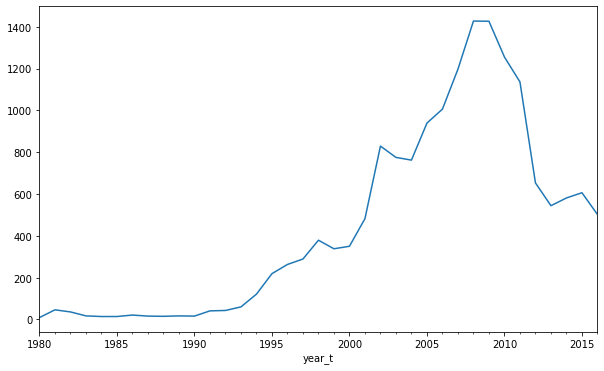

In [89]:
#Cuantos juegos fueron lanzados por periodo de año (por rango de año)
gd.groupby("year_t")["name"].count().plot(figsize=(10, 6))
plt.show()

Se investigó a que pudo haberse debido la disminución de videojuegos lanzados a partir del 2011, y fue por la falta de novedades en las consolas. Del año 2006 al 2011, y los lanzamientos estuveron por encima de los 1.000 videojuegos, alcanzando su valor más alto en el año 2008-2009, entre 1.400 juegos aprox.

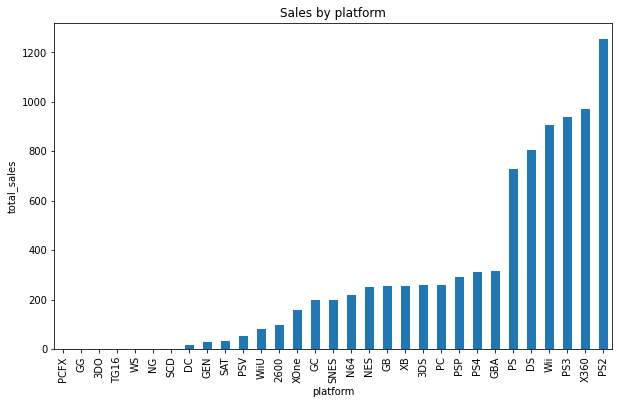

In [90]:
#Variación de las ventas de una plataforma a otra
sales_platform = gd.groupby("platform")["total_sales"].agg(sum)
sales_platform.sort_values().plot(kind="bar", title= f"Sales by platform", figsize=(10, 6))
plt.xlabel(f"platform")
plt.ylabel(f"total_sales")
plt.show() 

In [91]:
#Plataforma con mayores ventas totales
m_p_p = gd.groupby("platform")["total_sales"].sum().sort_values(ascending=False).head().index.tolist()
m_p_p

['PS2', 'X360', 'PS3', 'Wii', 'DS']

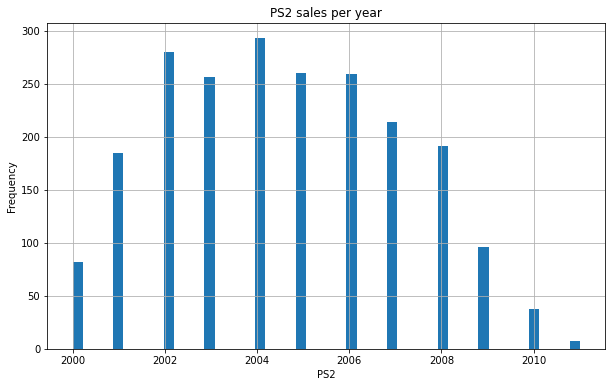

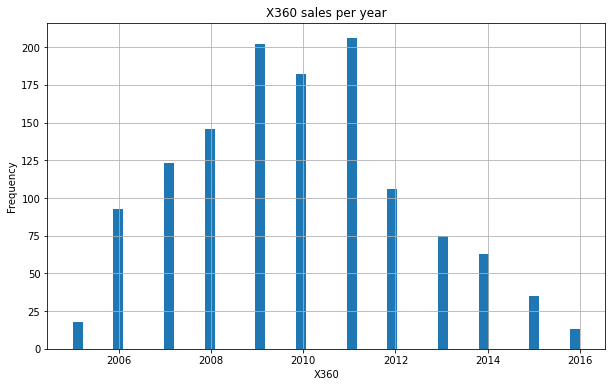

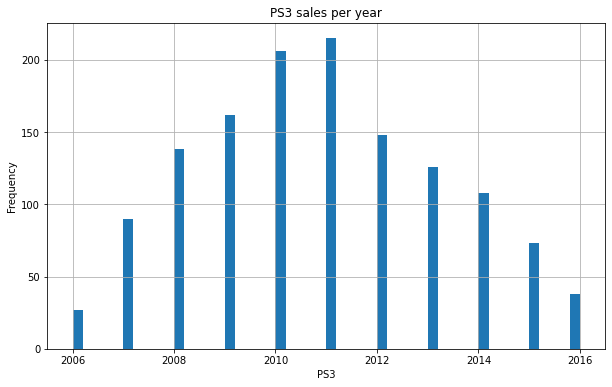

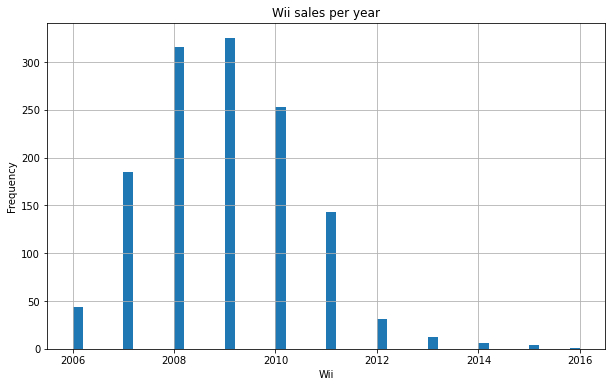

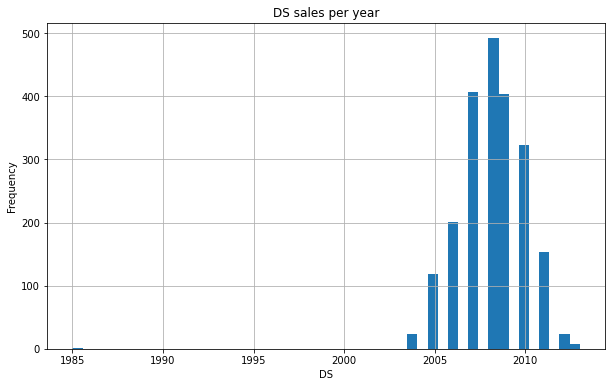

In [92]:
#Función que usaremos para estudiar los parámetros principales de las plataformas con mayores ventas totales

for y in m_p_p:
    
    gd[gd["platform"] == y]["good_year"].plot(kind="hist", bins=50, title= f"{y} sales per year", figsize=(10,6), grid=True)
    plt.xlabel(f"{y}")
    plt.show()

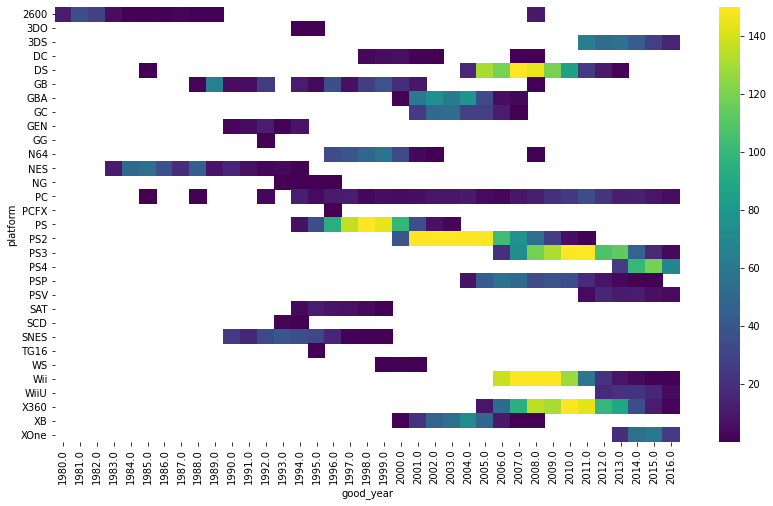

In [93]:
#¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
fig,ax=plt.subplots(1,1,figsize=(14,8))
a = (
gd
.pivot_table(index="good_year", columns= "platform", values= "total_sales", aggfunc= "sum").T
)
sns.heatmap(a, cmap="viridis", vmax=150)
plt.show()

Las antiguas plataformas tardan en desaparecer aprox. 10 años, y las nuevas plataformas en aparecer siete años aprox.

In [94]:
#Determinando para qué período tomar datos
new_gd = gd[gd["good_year"] >= 2013]

In [95]:
len(gd.loc[gd["good_year"] < 2013]) / len(gd)

0.8663315981571232

In [96]:
new_gd["good_year"].unique()

array([2013., 2015., 2014., 2016.])

In [97]:
new_gd.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,good_year,year_t,year_category
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,2013.0,2013-01-01,2010-2016
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,2013.0,2013-01-01,2010-2016
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63,2015.0,2015-01-01,2010-2016
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,14.60,2013.0,2013-01-01,2010-2016
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,2014.0,2014-01-01,2010-2016


Se escogió tomar los datos para el año 2013 en adelante, que nos permitirá construir un modelo para el año 2017.

In [98]:
#distribución general de los juegos por género, plataformas con más ventas.
sales_by_platform = new_gd.groupby("platform")["total_sales"].sum().sort_values(ascending=False)

In [99]:
#plataformas líderes en ventas
top_5_popular_platform = sales_by_platform.head(5).index.tolist()

top_5_popular_platform_data = new_gd.loc[new_gd["platform"].isin(top_5_popular_platform)]

print(f"Unique platform: {len(new_gd['platform'].unique())}")
print(top_5_popular_platform)
sales_by_platform.head(5)

Unique platform: 11
['PS4', 'PS3', 'XOne', '3DS', 'X360']


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64

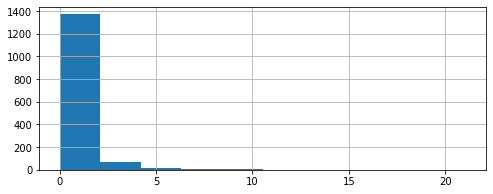

In [100]:
top_5_popular_platform_data["total_sales"].hist(figsize=(8,3))
plt.show()

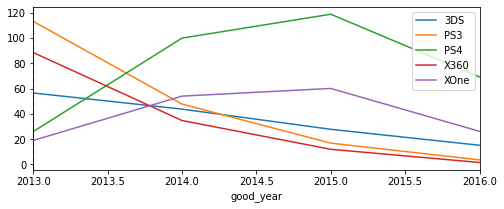

In [101]:
#Plataformas que crecen o disminuyen según sus ventas
(
top_5_popular_platform_data
.pivot_table(values="total_sales",
             index="good_year",
             columns="platform",
             aggfunc="sum")
.plot(kind="line", figsize=(8, 3))
)
plt.axvline(x=2013, ls="--", color="black")
plt.xlim(2013, 2016)
plt.legend()
plt.show()

Se evidencia un crecimiento en el PS4 y XOne hasta el año 2015, y una disminución en ventas para el resto.

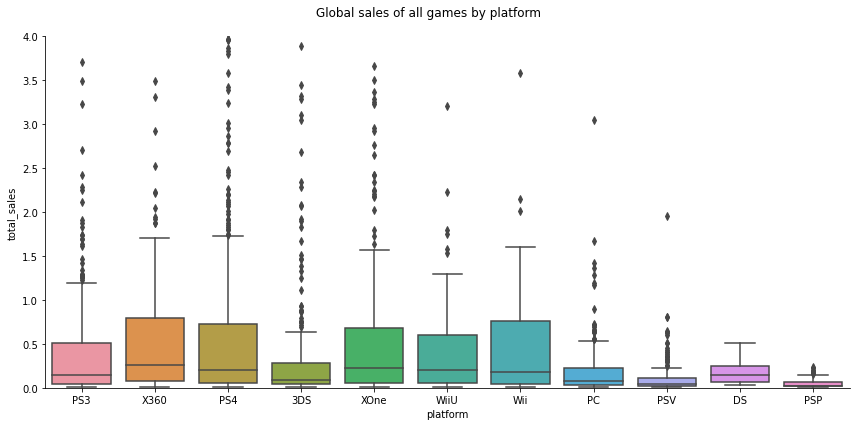

In [102]:
#Ventas globales de todos los juegos, desglosados por plataforma
calls= sns.catplot(data= new_gd, x="platform", y="total_sales", kind="box", height=6, aspect=2)
calls.fig.suptitle('Global sales of all games by platform')
plt.ylim(0,4)
plt.tight_layout()
plt.show()

Se evidencia mayor venta en las plataformas X360, PS4, XOne, WiiU y Wii. La media del DS, es muy similar a las plataformas nombradas anteriormente, a pesar de que su venta fue menor comparado con ellas.

**Correlación entre las reseñas y las ventas**

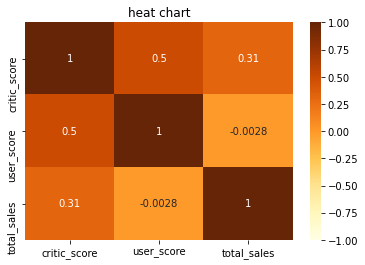

In [103]:
#Matriz de correlación "Gráfico de calor"
factors = ["critic_score", "user_score", "total_sales"]
sns.heatmap(new_gd[factors].corr(), annot=True, cmap="YlOrBr", vmax=1, vmin=-1)
plt.title("heat chart")
plt.show()

Las columnas **"total_sales vs critic_score"** (correlación positiva) tienen una *correlación débil*.

Las columnas **"total_sales vs user_score"** (correlación negativa) tienen una *debil relación lineal*. Hay una compleja conexión no lineal.

In [104]:
#Cómo las reseñas de usuarios y profesionales afectan las ventas de las plataformas populares
mpp1 = new_gd.query('platform in "PS4"')
mpp2 = new_gd.query('platform in "PS3"')
mpp3 = new_gd.query('platform in "XOne"')

**Gráfico de dispersión**

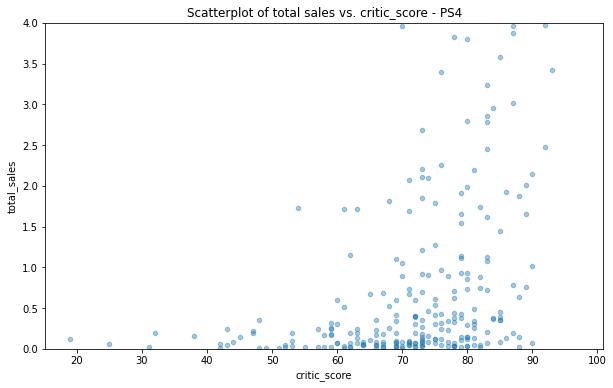

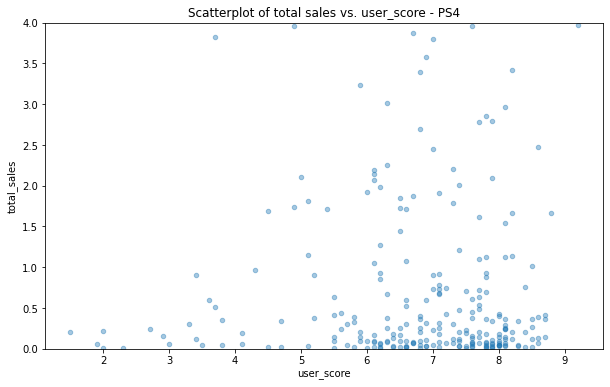

In [105]:
score = ["critic_score", "user_score"]

def plot_scatter(df, variable, name):
    
    df.plot(kind="scatter", x=variable, y="total_sales", alpha=0.4, figsize=(10,6))
    plt.title(f"Scatterplot of total sales vs. {variable} - {name}")
    plt.ylim(0,4)
    plt.show()
    
for variable in score:
    plot_scatter(mpp1, variable, "PS4")

**Conclusiones PS4**

Analizando los gráficos de dispersión de las reseñas que impactan a las ventas, observamos:

- `critic_score`, la puntuación de la crítica entre 60 a 80 puntos, tuvo ventas representativas de 0.1 a 0.2 millones de dólares aprox.
        
    
- `user_score`, la puntuación de los usuarios entre 7.6 a 8.1 puntos, tuvo ventas representativas de 0.1 a 0.35 millones de dólares aprox.

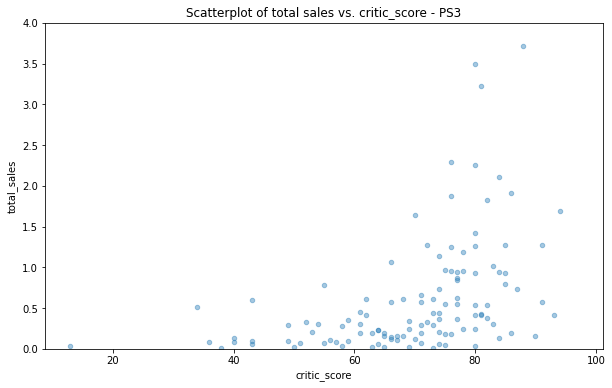

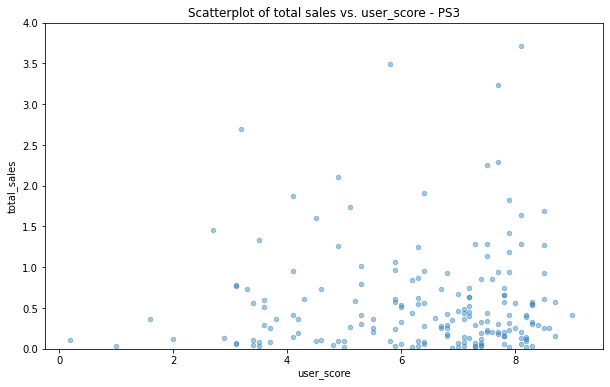

In [106]:
for variable in score:
    plot_scatter(mpp2, variable, "PS3")

**Conclusiones PS3**

Analizando los gráficos de dispersión de las reseñas que impactan a las ventas, observamos:

- `critic_score`, la puntuación de la crítica entre 65 puntos, tuvo ventas representativas de 0.2 a 0.3 millones de dólares aprox.
        
    
- `user_score`, la puntuación de los usuarios entre 7.5 a 8.2 puntos, tuvo ventas representativas de 0.1 a 0.6 millones de dólares aprox.

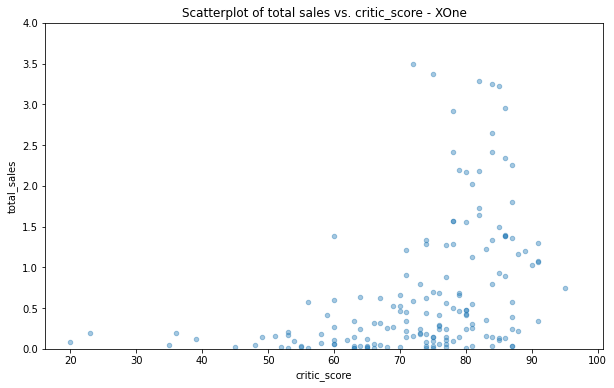

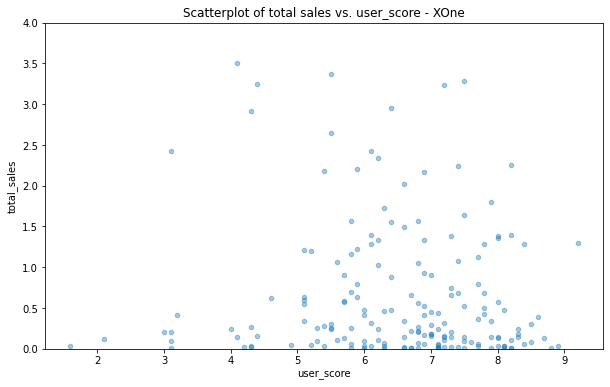

In [107]:
for variable in score:
    plot_scatter(mpp3, variable, "XOne")

**Conclusiones XOne**

Analizando los gráficos de dispersión de las reseñas que impactan a las ventas, observamos:

- `critic_score`, la puntuación de la crítica entre 60 a 80 puntos, tuvo ventas representativas de 0.1 a 0.6 millones de dólares aprox.
        
    
- `user_score`, la puntuación de los usuarios entre 6.0 a 8.2 puntos, tuvo ventas representativas de 0.1 a 0.3 millones de dólares aprox.

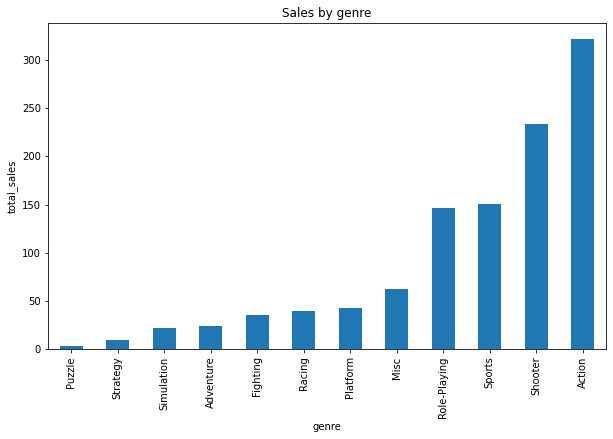

In [108]:
#Distribución general de los juegos por género
sales_genre = new_gd.groupby("genre")["total_sales"].agg(sum)
sales_genre.sort_values().plot(kind="bar", title= f"Sales by genre", figsize=(10, 6))
plt.xlabel(f"genre")
plt.ylabel(f"total_sales")
plt.show()

In [109]:
m_p_g = gd.groupby("genre")["total_sales"].sum().sort_values(ascending=False).head().index.tolist()
m_p_g

['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']

Los generos con más ventas son: Action, Sports, Shooter, Role-Playing y Platform.

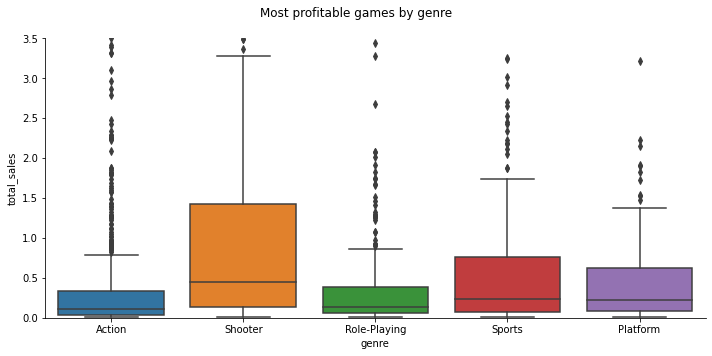

In [110]:
#distribución general de los juegos por género más rentables
games = new_gd[new_gd["genre"].isin(m_p_g)]
calls= sns.catplot(data= games, x="genre", y="total_sales", kind="box", height=5, aspect=2)
calls.fig.suptitle('Most profitable games by genre')
plt.ylim(0,3.5)
plt.tight_layout()
plt.show()

**Conclusión intermedia**

Analizando el gráfico de caja de los juegos por genero más rentables, observamos:

- En el genero Shooter, tiene mayor venta y su mediana es de 0.5,
- Seguido por los generos Sports y Platform, donde sus medianas estan en 0.3 aprox. donde el genero Sports tiene más ventas,
- Los generos Role-Playing y Action, son los que menor venta tuvieron.

[Volver a Contenidos](#back)


## Perfil de usuario para cada región <a id='perfil_de_usuario_para_cada_región'></a>

### Plataformas principales

In [111]:
regions = ["na_sales", "eu_sales", "jp_sales", "other_sales"]
sales_by_platform = new_gd.groupby("platform")["total_sales"].sum().reset_index()

for region in regions:
  sales_by_platform_region = new_gd.groupby("platform")[region].sum().reset_index()
  sales_by_platform_region = pd.merge(sales_by_platform_region, sales_by_platform, on="platform")
  sales_by_platform_region["market_share"] = 100 * sales_by_platform_region[region] / sales_by_platform_region["total_sales"]

  print(region)
  print(sales_by_platform_region.sort_values(by=region, ascending=False).head(5))
  print()

na_sales
   platform  na_sales  total_sales  market_share
4       PS4    108.74       314.14     34.615140
10     XOne     93.12       159.32     58.448406
9      X360     81.66       136.80     59.692982
3       PS3     63.50       181.43     34.999724
0       3DS     38.20       143.25     26.666667

eu_sales
   platform  eu_sales  total_sales  market_share
4       PS4    141.09       314.14     44.913096
3       PS3     67.81       181.43     37.375296
10     XOne     51.59       159.32     32.381371
9      X360     42.52       136.80     31.081871
0       3DS     30.96       143.25     21.612565

jp_sales
  platform  jp_sales  total_sales  market_share
0      3DS     67.81       143.25     47.336824
3      PS3     23.35       181.43     12.869977
6      PSV     18.66        33.25     56.120301
4      PS4     15.96       314.14      5.080537
8     WiiU     10.88        64.63     16.834287

other_sales
   platform  other_sales  total_sales  market_share
4       PS4        48.35      

**Conclusión intermedia**

Según los resultados anteriores se puede observar:

- **`PS4`**= es más popular en Europa y USA que en Japón.
- **`XOne` y `X360`**= es más popular en USA y Europa, pero en ni siquiera esta en el top cinco de popularidad.
- **`PS3`**= es la segunda plataforma más popular de USA, la tercera en Europa y la cuarta en Japón.
- **`PSV` & `3DS`**= son las primera y segunda plataforma más popular en Jaón; sin embargo, solo el 3DS es el quinto más popular en para Europa y USA.

### Generos principales

In [112]:
regions = ["na_sales", "eu_sales", "jp_sales", "other_sales"]
sales_by_genre = new_gd.groupby("genre")["total_sales"].sum().reset_index()

for region in regions:
  sales_by_platform_genre = new_gd.groupby("genre")[region].sum().reset_index()
  sales_by_platform_genre = pd.merge(sales_by_platform_genre, sales_by_genre, on="genre")
  sales_by_platform_genre["market_share"] = 100 * sales_by_platform_genre[region] / sales_by_platform_genre["total_sales"]

  print(region)
  print(sales_by_platform_genre.sort_values(by=region, ascending=False).head(5))
  print()

na_sales
           genre  na_sales  total_sales  market_share
0         Action    126.05       321.87     39.161773
8        Shooter    109.74       232.98     47.102756
10        Sports     65.27       150.65     43.325589
7   Role-Playing     46.51       146.15     31.823469
3           Misc     27.49        62.82     43.759949

eu_sales
           genre  eu_sales  total_sales  market_share
0         Action    118.13       321.87     36.701153
8        Shooter     87.86       232.98     37.711392
10        Sports     60.52       150.65     40.172585
7   Role-Playing     37.02       146.15     25.330140
6         Racing     20.19        39.89     50.614189

jp_sales
          genre  jp_sales  total_sales  market_share
7  Role-Playing     51.11       146.15     34.970920
0        Action     40.49       321.87     12.579613
3          Misc      9.20        62.82     14.645018
2      Fighting      7.65        35.31     21.665251
8       Shooter      6.61       232.98      2.837153

othe

**Conclusión intermedia**

Según los resultados anteriores se puede observar:

- **`Shooter`**= es más popular en USA, el tercero de Europa y el quinto de Japón.
- **`Misc`**= es el segundo más popular de USA y el tercero de Japón. En Europa, ni siquiera esta en el top cinco de popularidad.
- **`Racing`**= es la primera plataforma más popular de Europa y para USA y Japón, no figura en el top cinco.
- **`Sports`**= es la segunda y tercera plataforma más popular para Europa y USA; sin embargo, no figura para Japón.
- **`Role-Playing`**= es la primera plataforma más popular para Japón. Para Europa y USA, es la quinta plataforma más popular.

### Clasificación ESRB

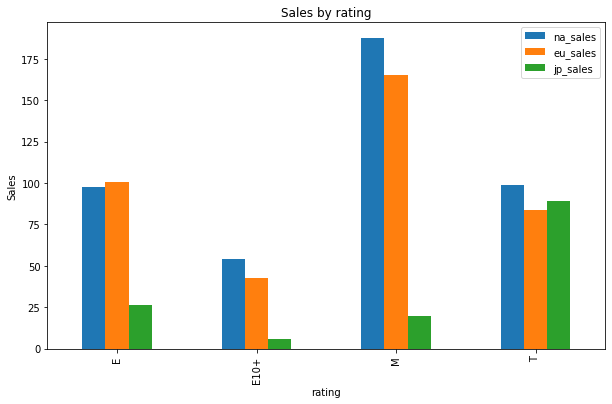

In [113]:
#Las clasificaciones de ESRB afectan a las ventas en regiones individuales
new_gd.groupby("rating").agg({"na_sales":"sum", "eu_sales":"sum", "jp_sales":"sum"}).plot(kind="bar", figsize=(10, 6))
plt.title(f"Sales by rating")
plt.xlabel(f"rating")
plt.ylabel(f"Sales")
plt.show()

**Conclusión intermedia**

- La categoria E, E10+ y M afecta a la región de Japón,
- La categoria E, E10+, M y T no agecta la ventas de Norteamérica.

[Volver a Contenidos](#back)

## Probando las hipótesis estadísticas <a id='probando_las_hipótesis_estadísticas'></a>

In [114]:
#Calculando media, varianza y desviación estandar para platform
statistics = (
  new_gd
 .groupby("platform")
 .agg({"user_score": ["mean", np.var, "std"]})
)
statistics

user_score                     
               mean        var       std
platform                                
3DS        6.976250   2.368163  1.538884
DS         4.800000        NaN       NaN
PC         6.269677   3.035893  1.742381
PS3        6.348387   3.229430  1.797061
PS4        6.748249   2.130085  1.459481
PSP        5.850000  12.005000  3.464823
PSV        7.528000   1.731127  1.315723
Wii        5.257143   3.592857  1.895483
WiiU       7.017500   1.977411  1.406205
X360       5.993007   2.604599  1.613877
XOne       6.521429   1.906997  1.380941

In [115]:
#Calculando media, varianza y desviación estandar para genre
statistics = (
  new_gd
 .groupby("genre")
 .agg({"user_score": ["mean", np.var, "std"]})
)
statistics

user_score                    
                   mean       var       std
genre                                      
Action         6.837532  1.769361  1.330173
Adventure      7.461667  1.688506  1.299425
Fighting       7.037500  1.918989  1.385276
Misc           6.975000  1.407010  1.186174
Platform       6.713793  2.889631  1.699891
Puzzle         7.471429  0.885714  0.941124
Racing         6.080000  2.989750  1.729089
Role-Playing   7.378102  1.479370  1.216294
Shooter        6.342308  2.167489  1.472239
Simulation     6.054839  3.347892  1.829725
Sports         5.238125  3.180613  1.783427
Strategy       6.183333  4.351092  2.085927

### Calificaciones promedio de los usuarios para las plataformas

#### Corroborando si las muestras presentan una distribución normal

In [116]:
#Creando una tabla para cada plataforma, Xbox One y PC.
xbox_one = new_gd.loc[new_gd["platform"] == "XOne"]
pc = new_gd.loc[new_gd["platform"] == "PC"]

In [117]:
stats.shapiro(
    xbox_one["user_score"].dropna(),
)

ShapiroResult(statistic=0.955055296421051, pvalue=1.524856543255737e-05)

In [118]:
stats.shapiro(
    pc["user_score"].dropna(),
)

ShapiroResult(statistic=0.9416003823280334, pvalue=5.039790721639292e-06)

**Conclusión intermedia**

A partir de los resultados obtenidos, ya que ambos pvalue son menor a 0.05, podemos concluir que ninguno de los dos vectores son normales.

#### Definición de hipótesis nula e hipótesis alternativa

- **`H0`**= las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son *iguales*.

- **`H1`**= las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son *diferentes*.

#### Prueba de hipótesis

In [119]:
# Prueba las hipótesis

alpha= 0.05

statistic, p_value  = st.mannwhitneyu(
    xbox_one["user_score"].dropna(),
    pc["user_score"].dropna()
)

print('statistic: ', statistic)
print()
print('p_value: ', p_value)
print()
print(p_value, "<", alpha)

if p_value < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

statistic:  14705.0

p_value:  0.5011006734622374

0.5011006734622374 < 0.05
No rechazamos la hipótesis nula


La probabilidad de que statistic ocurra es de 50.11 % y las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son *iguales*.

### Calificaciones promedio de los usuarios para los géneros

#### Corroborando si las muestras presentan una distribución normal

In [120]:
new_gd["genre"].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

In [121]:
action = new_gd.loc[new_gd["genre"] == "Action"]["user_score"]
sports = new_gd.loc[new_gd["genre"] == "Sports"]["user_score"]

In [122]:
stats.shapiro(
    action.dropna(),
)

ShapiroResult(statistic=0.9072277545928955, pvalue=1.0798927229597587e-14)

In [123]:
stats.shapiro(
    sports.dropna(),
)

ShapiroResult(statistic=0.9816822409629822, pvalue=0.03234051540493965)

**Conclusión intermedia**

A partir de los resultados obtenidos, ya que ambos pvalue son menor a 0.05, podemos concluir que ninguno de los dos vectores son normales.

#### Definición de hipótesis nula e hipótesis alternativa

- **`H0`**= las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son *iguales*.

- **`H1`**= las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son *diferentes*.

#### Prueba de hipótesis

In [124]:
# Prueba las hipótesis

alpha= 0.05

statistic, p_value  = st.mannwhitneyu(
    action.dropna(),
    sports.dropna()
)

print('statistic: ', statistic)
print()
print('p_value: ', p_value)
print()
print(p_value, "<", alpha)

if p_value < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

statistic:  48005.0

p_value:  1.5189170584819927e-23

1.5189170584819927e-23 < 0.05
Rechazamos la hipótesis nula


La probabilidad de que statistic ocurra es de 1.5189170584819927e-21 % y las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son *diferentes*.

[Volver a Contenidos](#back)

In [125]:
# Prueba las hipótesis

alpha= 0.05


# Verificando si los datos tienen una dist. normal

_, var_p_value = stats.levene(action, sports)

if var_p_value > alpha:
    print("Las varianzas de ambos grupos son iguales.")
    print()
else:
    print("Las varianzas de ambos grupos no son iguales.")
    print()
    

#Prueba de hipótesis

t_statistic, p_value  = stats.ttest_ind(
    action,
    sports,
    nan_policy="omit",
    equal_var=False
)

print('t_statistic: ', t_statistic)
print()
print('p_value: ', p_value)
print()
print(p_value, "<", alpha)

if p_value < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

Las varianzas de ambos grupos no son iguales.

t_statistic:  10.23342841744863

p_value:  1.4460039700703482e-20

1.4460039700703482e-20 < 0.05
Rechazamos la hipótesis nula


La probabilidad de que t_statistic ocurra es de 1.4460039700703482e-18 % y las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son *diferentes*.

## Conclusión general <a id='end'></a>

 - **`1`**.- Las plataformas líderes en ventas fueron PS4, PS3, XOne, 3DS y X360. Sin embargo, pudimos observar que para cada región estas varían.        
    
 - **`2`**.- Las clasificaciones de los videojuegos donde "*todos*" pueden jugar, los que tienen más de 10 y 17 años, afectan las ventas de Japón. A diferencia de la categoría Adolescente, donde el más impactado es Europa. Estados Unidos, es el menos afectado por las clasificaciones de los videojuegos, solamente está por debajo de Europa en la clasificaciones "todos".
      
 - **`3`**.- Al probar las hipótesis estadísticas tenemos:
     
     **a).- Calificaciones promedio de los usuarios para las plataformas Xbox One y PC**: se aprueba la hipótesis nula, por lo cuál las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son *iguales*.
     
     **b).- Calificaciones promedio de los usuarios para los géneros de Acción y Deportes**: se rechaza la hipótesis nula, por lo cuál las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
     
[Volver a Contenidos](#back)